# Intro data science - portfolio assignment 13: Bivariate analysis categorical vs. categorical penguins dataset

10 min: Do a bivariate analysis on the penguins dataset for the following combination of columns:

- species vs sex
- island vs sex

For this bivariate analysis, at least perform the following tasks:

- Do you expect there to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [15]:
import pandas as pd
import seaborn as sns

In [16]:
penguins = sns.load_dataset('penguins')

penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

## Species vs sex

I'm not sure if there would be a correlation between species and sex. It could very well be that a certain species has more male of female penguins than other species. Let's find out.

In [17]:
cont1 = penguins.groupby(['species', 'sex']).size().unstack('species', fill_value=0)

cont1

species  Adelie  Chinstrap  Gentoo
sex                               
Female       73         34      58
Male         73         34      61

It looks like all species have an equal amount of male/female penguins.

<AxesSubplot:xlabel='sex'>

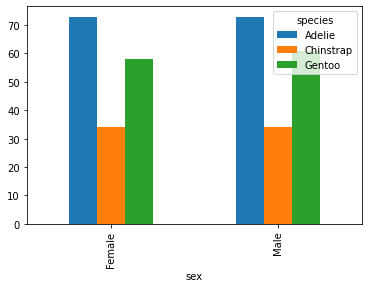

In [18]:
cont1.plot(kind='bar')

In [19]:
from scipy.stats import chi2_contingency

In [20]:
chi2_contingency(cont1)

(0.04860717014078319,
 0.9759893689765846,
 2,
 array([[72.34234234, 33.69369369, 58.96396396],
        [73.65765766, 34.30630631, 60.03603604]]))

What do we see here? According to the chi-squared test, there is a 97.6% chance of there being no correlation between species and sex. We can clearly see this in the bar plot, as there is pretty much no difference between the species' sex.

## Island vs sex

After looking at the correlation between species and sex, I expect there to be no correlation between island and sex.

In [21]:
cont2 = penguins.groupby(['island', 'sex']).size().unstack('island', fill_value=0)

cont2

island  Biscoe  Dream  Torgersen
sex                             
Female      80     61         24
Male        83     62         23

<AxesSubplot:xlabel='sex'>

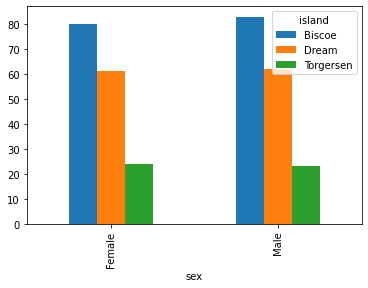

In [22]:
cont2.plot(kind='bar')

Pretty much what I expected!

In [23]:
chi2_contingency(cont2)

(0.05759904881286206,
 0.971611229281065,
 2,
 array([[80.76576577, 60.94594595, 23.28828829],
        [82.23423423, 62.05405405, 23.71171171]]))

There is a 97.2% chance of there being no correlation between island sex. Sounds about right to me.